# Gradient Boosting

## Machine Learning Methods 


### Module 6: Advanced Machine Learning Models 
### Part 3: Random Forest vs. Gradient Boosting

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

- Video: https://youtu.be/xZw-hWRpt2A

- **Ensemble learning** combines multiple base models to improve overall performance and robustness.

- Two popular ensemble techniques are **Bagging** (Bootstrap Aggregating) and **Boosting**.

    - **Bagging** builds multiple independent models in parallel using bootstrapped (resampled) datasets and averages their predictions to reduce variance.

    - **Boosting** builds models sequentially, where each new model focuses on correcting the errors of the previous ones, reducing bias and improving accuracy.


- These techniques are especially effective when combining **weak learners**—models that perform slightly better than random chance.

> In this notebook, we focus on using **Decision Trees** as base models for Bagging and Boosting. However, these techniques are versatile and can be applied to other machine learning models as well.


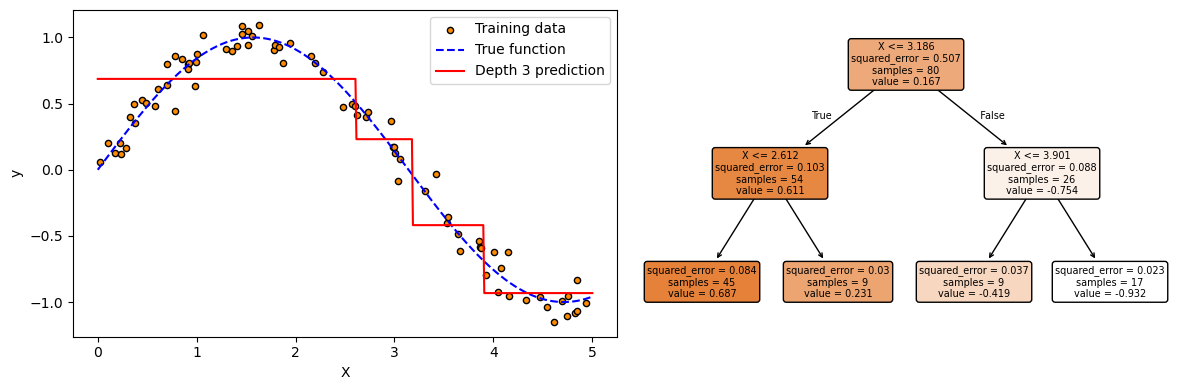

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 1. Generate synthetic data: noisy sine wave
np.random.seed(42)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Generate test data for smooth plotting
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# 3. Fit model with max_depth=2
model = DecisionTreeRegressor(max_depth=2, random_state=0)
model.fit(X, y)
y_pred = model.predict(X_test)

# 4. Plot vertically: Prediction on top, tree below
plt.figure(figsize=(12, 4))

# Prediction plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, y_pred, "r", label="Depth 3 prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Tree structure
plt.subplot(1, 2, 2)
plot_tree(model, filled=True, rounded=True, feature_names=["X"], fontsize=7)

plt.tight_layout()
plt.show()


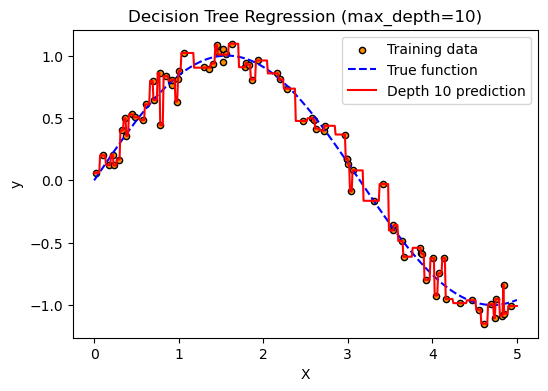

In [19]:
# 3. Fit model with max_depth=10
model = DecisionTreeRegressor(max_depth=10, random_state=0)
model.fit(X, y)
y_pred = model.predict(X_test)

# 4. Plot vertically: Prediction on top, tree below
plt.figure(figsize=(6, 4))

# Prediction plot
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, y_pred, "r", label="Depth 10 prediction")
plt.title("Decision Tree Regression (max_depth=10)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Bagging (Bootstrap Aggregating) Algorithm
<hr style="border:2px solid gray">


- Bagging is an ensemble method that builds multiple models on different bootstrapped subsets of the data and combines their outputs, typically by averaging (for regression) or majority vote (for classification).


**Algorithm: Bagging (for Regression)**

1. **Input:** Training dataset $\mathcal{D}$ with $n$ samples, number of models $B$ (typically $B = 100$)

2. **For** $b = 1, \ldots, B$:
   - Sample a **bootstrap dataset** $\mathcal{D}_b$ from $\mathcal{D}$ (i.e., sample $n$ points with replacement)
   - Train a base model $f^{(b)}(x)$ on $\mathcal{D}_b$

3. **Output:** The final bagged prediction is:
   $$
   f^{\text{bagging}}(x) = \frac{1}{B} \sum_{b=1}^B f^{(b)}(x)
   $$


### Random Forest: Bagging + Feature Randomness
<hr style="border:2px solid gray">


Random Forests build on the idea of bagging by also introducing **randomness at the feature level** to reduce correlation between individual trees:

- At **each split** in a decision tree, instead of considering all $p$ features, a random subset of features is selected.
- For classification tasks, this subset size is usually $\sqrt{p}$.
- This extra layer of randomness ensures that the individual trees are decorrelated, making the ensemble more effective.


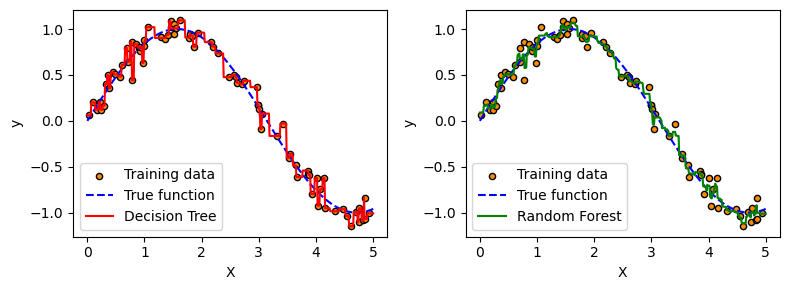

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Generate synthetic data: noisy sine wave
np.random.seed(42)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Generate test data for smooth plotting
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# 3. Fit a single Decision Tree (depth 10)
dt_model = DecisionTreeRegressor(max_depth=10, random_state=0)
dt_model.fit(X, y)
dt_pred = dt_model.predict(X_test)

# 4. Fit a Random Forest with 100 trees (depth 10)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf_model.fit(X, y)
rf_pred = rf_model.predict(X_test)

# 5. Plot predictions
plt.figure(figsize=(8, 3))

# Top: Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, dt_pred, "r", label="Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Bottom: Random Forest
plt.subplot(1, 2, 2)
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, rf_pred, "g", label="Random Forest")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

### Mean Decrease Impurity (MDI) 
<hr style="border:2px solid gray">

- Random Forests build numerous decision trees, making direct visualization and interpretation challenging.
- MDI provides a way to distill the complex model into a simple, interpretable **feature importance** metric.

- Impurity Reduction
    - Each tree evaluates features to minimize "impurity" at each node split.
    - The definition of impurity depends on the task:
    
          - Classification: Gini Index or Entropy
          - Regression: Variance (often via Mean Squared Error)
    - When a feature is used to split a node, it reduces the impurity — this reduction is recorded as its **contribution**.

- MDI averages the impurity reduction attributed to each feature across all trees in the forest.
- This results in a robust, aggregated estimate of how important each feature is to the model's predictions.
- Features with higher MDI values are considered more important.


R2 score: 0.46


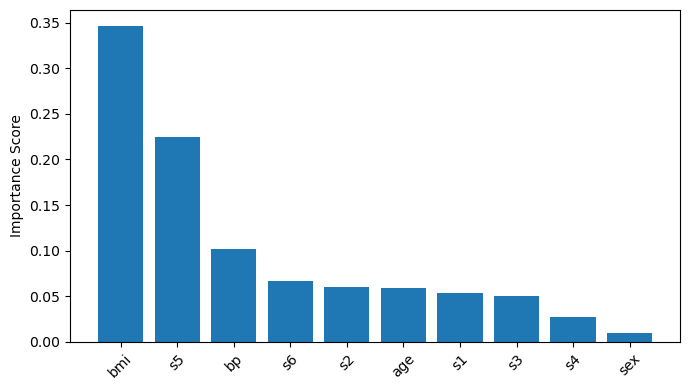

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(7, 4))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


- List of features for this dataset: 
    - age: Age in years  
    - sex
    - bmi: Body Mass Index  
    - bp: Average blood pressure  
    - s1: TC, total serum cholesterol  
    - s2: LDL, low-density lipoproteins  
    - s3: HDL, high-density lipoproteins  
    - s4: TCH, total cholesterol / HDL  
    - s5: LTG, possibly log of serum triglycerides level  
    - s6: GLU, blood sugar level


### Boosting
<hr style="border:2px solid gray">

- Like bagging, boosting is a general ensemble approach that can be applied to many machine learning methods.

- Unlike bagging, boosting trains models sequentially, not in parallel.

- Boosting does not involve bootstrapping (sampling with replacement); instead, each tree is trained on a modified version of the original dataset.

- At each step, a new model is trained to fit the **residuals (errors)** of the current model.

- This means the new decision tree is fit not to the original outputs, but to the **errors** made by the current ensemble.

- The new tree is then added to the existing model, and the residuals are updated.

**Algorithm: Boosting (for Regression)**

1. **Initialize** the model:
   - Set the initial prediction:  
     $$ \hat{f}(x) = 0 $$
   - Set residuals for all training points:  
     $$ r_i = y_i \quad \text{for all } i $$

2. **For** $b = 1, 2, \ldots, B$, repeat:
   
   a. Fit a regression tree $\hat{f}^b$ with $d$ splits to the **residuals** $r$ using the training data $(X, r)$.
   
   b. **Update the model** by adding a scaled version of the new tree:  
      $$
      \hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^b(x)
      $$
   
   c. **Update the residuals**:  
      $$
      r_i \leftarrow r_i - \lambda \hat{f}^b(x_i)
      $$

3. **Output the final boosted model**:  
   $$
   \hat{f}(x) = \sum_{b=1}^{B} \lambda \hat{f}^b(x)
   $$


> $\lambda$ is the **learning rate** (typically small, like 0.01), which controls how much each tree contributes.


### Gradient Boosting – Extension of Boosting
<hr style="border:2px solid gray">


* Gradient Boosting generalizes the boosting algorithm by allowing optimization of any differentiable loss function.
* Instead of using raw residuals, it fits each new model to the negative gradient of the loss function, called pseudo-residuals.

- **Pseudo-Residuals**: For each data point $x_i$, the pseudo-residual at boosting step $b$ is:

  \begin{equation*}
  r_{ib} = -\left[ \frac{\partial L(y_i, \hat{f}(x_i))}{\partial \hat{f}(x_i)} \right]_{\hat{f}(x) = \hat{f}_{b-1}(x)}
  \end{equation*}

  Where:
  - $L(y_i, \hat{f}(x_i))$ is the loss function (e.g., squared error, huber loss).
  - $\hat{f}_{b-1}(x_i)$ is the model prediction from the previous iteration.
  - $r_{ib}$ is the negative gradient — the direction in which the model should adjust its prediction to reduce the loss.

* For the **squared error (quadratic loss)**, the loss function for a single data point is:

\begin{equation*}
L(y_i, \hat{f}(x_i)) = \frac{1}{2} (y_i - \hat{f}(x_i))^2
\end{equation*}

   

\begin{equation*}
r_{ib} = -\frac{\partial L(y_i, \hat{f}(x_i))}{\partial \hat{f}(x_i)}= -(- (y_i - \hat{f}(x_i))) = y_i - \hat{f}(x_i)
\end{equation*}

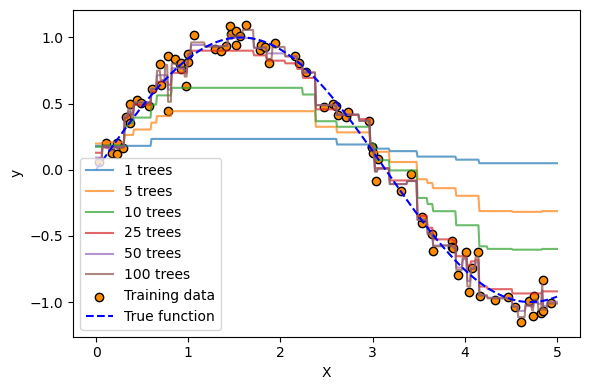

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# 1. Generate synthetic data: noisy sine wave
np.random.seed(42)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Generate test data for smooth plotting
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# 3. Fit Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X, y)

# 4. Plot the growth of predictions over iterations
plt.figure(figsize=(6, 4))
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    if i in [0, 4, 9, 24, 49, 99]:  # select a few iterations to plot
        plt.plot(X_test, y_pred, label=f"{i+1} trees", alpha=0.7)

# Plot original data and true function
plt.scatter(X, y, c="darkorange", edgecolor="k", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


### Further Reading 
<hr style="border:2px solid gray">

* Chapter 8 of An Introduction to Statistical Learning (ISL) with Python